# Lab 3 - BCC406

## REDES NEURAIS E APRENDIZAGEM EM PROFUNDIDADE

## Construindo uma rede neural

### Prof. Eduardo e Prof. Pedro Silva

##Aluna: Daniela Costa Terra

Data da entrega : 15/04 

- Complete o código (marcado com ToDo) e quando requisitado, escreva textos diretamente nos notebooks. Onde tiver *None*, substitua pelo seu código.
- Execute todo notebook e salve tudo em um PDF **nomeado** como "NomeSobrenome-Lab3.pdf"
- Envie o PDF para pelo [FORM](https://forms.gle/LdGDeFYH6wQm9ahh6)

# **Parte 1** - Rede neural do zero: passo a passo (10pt)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Notação**:
- Sobrescrito índice $ [l] $ indica os valores associados a $l$-ésima camada.
    - **Exemplo:** $ a^{[l]} $ é a ativação da $l$-ésima camada.
- Sobrescrito índice $ (i) $ indica os valores associados ao $i$-ésima exemplo.
    - **Exemplo:** $ x^{(i)} $ é o  $i$-ésima exemplo de treinamento.
- Subescrito índice $ j $ indica a $j$-ésima entrada de um vetor.
    - **Exemplo:** $a^{[l]}_j$ indica a $j$-ésima  entrada  da ativação da $ l$-ésima camada.

## 1 - Importação dos pacotes


Primeiro, vamos executar a célula abaixo para importar todos os pacotes que precisaremos.
- [numpy](www.numpy.org) é o pacote fundamental para a computação científica com Python.
- [h5py](http://www.h5py.org) é um pacote comum para interagir com um conjunto de dados armazenado em um arquivo H5.
- [matplotlib](http://matplotlib.org) é uma biblioteca famosa para plotar gráficos em Python.
- [PIL](http://www.pythonware.com/products/pil/) e [scipy](https://www.scipy.org/) são usados aqui para testar seu modelo.
- dnn_utils fornece algumas funções necessárias para este notebook.
- testCases fornece alguns casos de teste para avaliar as funções.
- np.random.seed (1) é usado para manter todas as chamadas de funções aleatórias. 

In [ ]:
# Para Google Colab: Você vai precisar fazer o upload dos arquivos no seu drive e montá-lo
# não se esqueça de ajustar o path para o seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Você vai precisar inserir seu diretório para importar as "bibliotecas próprias" auxiliares deste notebook
# não se esqueça de ajustar o path para o seu diretório

import sys
sys.path.append('/content/drive/MyDrive/disciplinasDoutorado/PCC177-2022-1(Redes)/lab3')

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
# bibliotecas auxiliares (ver testCases_v4a.py e dnn_utils_v2.py)
from testCases_v4a import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward
#

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 2 - Esboço das Funções auxiliares




- Inicialização dos parâmetros da rede.
- Implementação da fase forward propagation (roxo na figura abaixo).
     - Complete a parte LINEAR da etapa de forward propagation de uma camada (resultando em $ Z^{[l]}$).
     - Fornecemos a função ATIVAÇÃO (relu / sigmóide).
     - Combine os dois passos anteriores em uma nova função de avanço [LINEAR-> ATIVAÇÃO].
     - Empilhe a função de avanço [LINEAR-> RELU] L-1 (para as camadas 1 a L-1) e adicione um [LINEAR-> SIGMOID] no final (para a camada final $ L $). Isso fornece uma nova função L_model_forward.
- Cálculo a função loss.
- Implementação da fase backward propagation (vermelho na figura abaixo).
    - Complete a parte LINEAR da etapa de backward propagation de uma camada.
    - Fornecemos o gradiente da função (relu_backward / sigmoid_backward)
    - Combine as duas etapas anteriores em uma nova função [LINEAR-> ATIVAÇÃO] para trás.
    - Empilhe [LINEAR-> RELU] para trás L-1 vezes e adicione [LINEAR-> SIGMOID] para trás em uma nova função L_model_backward
- Atualização dos parâmetros.

![Arq,widht=10](https://drive.google.com/uc?export=view&id=19iowxbfZWLXFvB6eGP0hcRZcsQFltmHk)

<caption><center> **Figura 1**</center></caption><br>

**Observe** que para todas as etapas forward, existe uma etapa backward correspondente. É por isso que em cada etapa forward você estará armazenando alguns valores em cache. Os valores em cache são úteis para calcular gradientes. Na etapa backward, você usará o cache para calcular os gradientes. 

## 3 - Inicialização (1pt)



A função será usada para inicializar parâmetros para uma rede com $ L $-camadas.

### 3.1 - Rede Neural com $L$-camadas

**Instruções**:
- A estrutura do modelo é * [LINEAR -> RELU] $ \times $ (L-1) -> LINEAR -> SIGMOID *. Ou seja, possui (L-1) camadas  usando uma função de ativação ReLU seguida por uma camada de saída com uma função de ativação sigmóide.
- Use inicialização aleatória para as matrizes de peso. Use `np.random.randn(shape) * 0,01`.
- Use a inicialização de zeros para os vieses. Use `np.zeros(shape)`.
- Armazenaremos $ n ^ {[l]} $, o número de elementos/neurônios na camada $l$, em uma variável `camadas_dims`. Por exemplo, `camadas_dims = [2,4,1]` é uma rede com duas entradas, uma camada oculta com 4 unidades/neurônios e uma camada de saída com 1 unidade/neurônio de saída . 

In [ ]:
# Inicialize_parametros

def inicialize_parametros(camadas_dims):
    """
    Entrada:
    camadas_dims -- python array (lista) contendo a dimensão de cada camada da rede
    
    
    Saída:
    parametros   -- python dicionario contendo os parametros "W1", "b1", ..., "WL", "bL":
                    Wl -- vetor de pesos com formato (camadas_dims[l], camadas_dims[l-1])
                    bl -- vetor de vies com formato (camadas_dims[l], 1)
    """
    
    np.random.seed(3)
    parametros = {}
    L = len(camadas_dims)         # ToDo: número de camadas da rede

    ### Início do código ### 
    for l in range(1, L):
      # dica: itere pelo número de camadas, inicializando pesos e viés de cada camada,
      # e armazenem em parameters (≈ 2 linhas de código)
      parametros['W' + str(l)] = np.random.randn(camadas_dims[l], camadas_dims[l-1]) * 0.01 # ToDo   
      parametros['b' + str(l)] = np.zeros((camadas_dims[l], 1)) # ToDo    
    ### Fim do código ###
        
    return parametros

**Comentários** 
Ao concluir o `inicialize_parametros`, certifique-se de que as dimensões entre cada camada estejam corretas. Lembre-se de que $ n ^ {[l]} $ é o número de unidades na camada $ l $. Assim, por exemplo, se o tamanho da nossa entrada $ X $ for $ (12288, 209) $ (com número de exemplos $ m = 209 $), então:

<table style="width:100%">


   <tr>
        <td>  </td> 
        <td> **Formato de W** </td> 
        <td> **Formato de b**  </td> 
        <td> **Ativação** </td>
         <td> **Formato da Ativação** </td> 
    <tr>
    
   <tr>
        <td> **Camada 1** </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td>         
        <td> $(n^{[1]},209)$ </td> 
    <tr>
    
   <tr>
        <td> **Camada 2** </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>
   
   <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>
    
   <tr>
        <td> **Camada L-1** </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
    <tr>
    
    
   <tr>
        <td> **Camada L** </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>

</table>


In [ ]:
# Teste
parametros = inicialize_parametros([5,4,3])
print("W1 = " + str(parametros["W1"]))
print("b1 = " + str(parametros["b1"]))
print("W2 = " + str(parametros["W2"]))
print("b2 = " + str(parametros["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


**Valores esperados**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td>[[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]</td> 
  </tr>
  
  <tr>
    <td>**b1** </td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]</td> 
  </tr>
  
  <tr>
    <td>**W2** </td>
    <td>[[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]</td> 
  </tr>
  
  <tr>
    <td>**b2** </td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]]</td> 
  </tr>
  
</table>

## 4 - Fase: Forward propagation (2pt)



Usaremos duas funções:
- LINEAR
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID

### 4.1 - Linear Forward 

A função linear_forward (sobre todos os examples) é definida pela equação:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

onde $A^{[0]} = X$. 


**Lembrete**
Lembre-se de que quando calculamos $ W X + b $ em python, ele realiza `broadcasting`. Por exemplo, se:
$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

Então $WX + b$ será:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

In [ ]:
# Função linear_forward

def linear_forward(A, W, b):
    """
    Implementa a parte linear da fase de propogação nas camadas

    Entradas:
    A - dados de entrada da camada atual (ativações da camada anterior): formato (tamanho da camada anterior, número de exemplos)
    W - matriz de pesos: matriz numpy com formato (tamanho da camada atual, tamanho da camada anterior)
    b - vetor de viés, matriz numpy com formato (tamanho da camada atual, 1)

    Saídas:
    Z -- a entrada da função de ativação, também chamada de parâmetro de pré-ativação
    cache - uma tupla python contendo "A", "W" e "b"; (armazenado para usar na fase backward propagation)
    """
    
    ### Início do código ### (≈ 2 linhas de código)
    Z = W.dot(A) + b # dica: use a funçao .dot() 
    cache = (A, W, b)
    ### Fim do código ###
    
    return Z, cache

In [ ]:
# Teste
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
Z, linear_cache

(array([[ 3.26295337, -1.23429987]]), (array([[ 1.62434536, -0.61175641],
         [-0.52817175, -1.07296862],
         [ 0.86540763, -2.3015387 ]]),
  array([[ 1.74481176, -0.7612069 ,  0.3190391 ]]),
  array([[-0.24937038]])))

**Valores Esperados**:

<table style="width:35%">
  
  <tr>
    <td> **Z** </td>
    <td> [[ 3.26295337 -1.23429987]] </td> 
  </tr>
  
</table>

### 4.2 - Linear-Ativação Forward

Usaremos duas funções de ativação:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. A função `sigmoid`, **retorna dois** itens: o valor de ativação "` a` "e um" `cache`" que contém "` Z` "(necessário para a fase backward correspondente). Para usá-lo, basta chamar: 
``` python
A, ativacao_cache = sigmoid(Z)
```

- **ReLU**: A formula é $A = RELU(Z) = max(0, Z)$. A função `relu`, **retorna dois** itens: o valor de ativação "` a` "e um" `cache`" que contém "` Z` "(necessário para a fase backward correspondente). Para usá-lo, basta chamar:
``` python
A, ativacao_cache = relu(Z)
```

**Exercício**: Implemente a *LINEAR-> ATIVAÇÃO* da camada da fase forward propagation. A relação matemática é: $ A^{[l]} = g (Z^{[l]}) = g (W^{[l]} A^{[l-1]} + b^{[l]} ) $ onde a ativação "g" pode ser `sigmoid` ou `relu`. Use a função linear_forward ().

In [ ]:
# Função linear_ativacao_forward

def linear_ativacao_forward(A_prev, W, b, ativacao):
    """
    Implementa a *LINEAR-> ATIVAÇÃO* da camada da fase forward propagation

    Entradas:
    A_prev -- dados de entrada da camada atual (ativações da camada anterior): formato (tamanho da camada anterior, número de exemplos)
    W - matriz de pesos: matriz numpy com formato (tamanho da camada atual, tamanho da camada anterior)
    b - vetor de viés, matriz numpy com formato (tamanho da camada atual, 1)
    ativacao -- "sigmoid" ou "relu"

    Saídas:
    A -- a saída da função de ativação, também chamada de valor da pós-ativação
    cache -- uma tupla python contendo "linear_cache" e "ativacao_cache"; 
    (armazenado para usar na fase backward propagation)          
    """
    A = np.array([])
    cache = ()
    if ativacao == "sigmoid":
        # Entradas: "A_prev, W, b". Saídas: "A, ativacao_cache".
        ### Início do código ###
        # dicas: use sua funcao de propagação e as funções de ativação fornecidas em dnn_utils_v2.py
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z) 
        cache = (linear_cache, activation_cache)
        ### Fim do código ###
    
    elif ativacao == "relu":
        # Entradas: "A_prev, W, b". Saídas: "A, ativacao_cache".
        ### Início do código ### 
        # dicas: use sua funcao de propagação e as funções de ativação fornecidas em dnn_utils_v2.py
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        cache = (linear_cache, activation_cache)
        ### Fim do código ###
    
    return A, cache

In [ ]:
# Teste

A_prev, W, b = linear_activation_forward_test_case()

A, linear_ativacao_cache = linear_ativacao_forward(A_prev, W, b, ativacao = "sigmoid")
print("com sigmoid: A = " + str(A))

A, linear_ativacao_cache = linear_ativacao_forward(A_prev, W, b, ativacao = "relu")
print("com ReLU: A = " + str(A))



com sigmoid: A = [[0.96890023 0.11013289]]
com ReLU: A = [[3.43896131 0.        ]]


**Valores esperados**:
       
<table style="width:35%">
  <tr>
    <td> **com sigmoid: A ** </td>
    <td > [[ 0.96890023  0.11013289]]</td> 
  </tr>
  <tr>
    <td> **com ReLU: A ** </td>
    <td > [[ 3.43896131  0.        ]]</td> 
  </tr>
</table>


### d) Modelo de L-camadas

Replica a função `linear_ativacao_forward` com RELU $(L-1)$ vezes, depois uma vez `linear_ativacao_forward` com SIGMOID.

![Arq,widht=10](https://drive.google.com/uc?export=view&id=19bhG0GkUjw3fLBTmoKjDZImWcq2nE2GD)


<caption><center> **Figura 2** : Esquema do modelo *[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* </center></caption><br>

**Instrução**: A variável `AL` é $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (ativaçnao da última camada, i.e., $\hat{Y}$.) 

In [ ]:
# L_modelo_forward

def L_modelo_forward(X, parametros):
    """
    Implementa a fase forward propagation 
    
    Entradas:
    X -- dados, numpy array de tamanho (input size, number of examples)
    parametros -- parametros iniciais
    
    Saídas:
    AL -- valor da pós-ativação da última camada
    caches -- lista dos caches contendo:
                todos caches da linear_ativacao_forward() (existem L-1 deles, indexados de 1 a L-1)
    """

    caches = []
    A = X                      # dados da camada inicial
    L = int(len(parametros)/2)      # números de camadas da rede
    
    # Implemente [LINEAR -> RELU]*(L-1). Adicione o "linear_cache" para a lista "caches".
    ### Início do código ### 
    for l in range(1, L):
        A_prev = A         
        A, cache = linear_ativacao_forward(A_prev, parametros["W"+str(l)], parametros["b"+str(l)], ativacao = "relu")    # dica: utilize linear_activation_forward()
        caches.append(cache)
    ### Fim do código ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### Início do código ### 
    AL, cache =   linear_ativacao_forward(A, parametros["W"+str(L)], parametros["b"+str(L)], ativacao = "sigmoid") # dica : utilize linear_activation_forward()
    caches.append(cache)
    ### Fim do código ###
    
               
    return AL, caches

In [ ]:
X, parametros = L_model_forward_test_case_2hidden()
AL, caches = L_modelo_forward(X, parametros)

print("AL = " + str(AL))
print("Tamanho da lista caches = " + str(len(caches)))

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Tamanho da lista caches = 3


**Valores Esperados:**

<table style="width:50%">
  <tr>
    <td> **AL** </td>
    <td > [[ 0.03921668  0.70498921  0.19734387  0.04728177]]</td> 
  </tr>
  <tr>
    <td> **Tamanho da lista caches ** </td>
    <td > 3 </td> 
  </tr>
</table>

Usando $A^{[L]}$, você deve calcular o custo da rede.

## 5 - Função Custo (cross-entropy) (2pt)




Para a fase backward propagation é necessário o cálculo da funcão custo.

**Exercício**: Use a seguinte função custo: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} \left(y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)\right) \tag{7}$$

obs.: veja que é a mesma implementada para o Lab1b.

In [ ]:
## Função custo

def custo(AL, Y, m):
    """
    Implementa a função custo da rede.

    Entradas:
    AL -- Probabiliade de predição da rede, (1, numero de exemplos)
    Y -- Vetor de rótulos dos exemplos de treinamento  ( 0 se não tem gato, 1 tem gato ), (1, numero de exemplos)

    Saída:
    custo -- custo da rede
    """
    
    #m = Y.shape[1] # número de exemplos

    # Compute loss from AL and y.
    ###Início do código ### (≈ 1 linha de código)
    print(m, 1/m)
    custo = -1/m*np.sum(np.sum(Y*np.log(AL) + (1 - Y)*np.log(1 - AL), axis=0))
    ### Fim do código ###
    
    custo = np.squeeze(custo)      # assegurar o formato experado ( [[17]] para 17).
    
    
    return custo

In [ ]:
Y, AL = compute_cost_test_case()

print("custo = " + str(custo(AL, Y,  m = Y.shape[1])))

3 0.3333333333333333
custo = 0.2797765635793422


**Valores Esperados**:

<table>

   <tr>
    <td>**custo** </td>
    <td> 0.2797765635793422</td> 
    </tr>
</table>

## 6 - Fase: Backward propagation (2pt)


Com funções auxiliares, a fase back propagation é usada para calcular o gradiente da função loss em relação aos parâmetros. 

**Lembrete**: 
![Arq,widht=10](https://drive.google.com/uc?export=view&id=19lwOgDLuWoMzXjHafCPkj3dzZcSyeh0r)

<caption><center> **Figura 3** : <br> *Os blocos roxos representam a fase forward propagation, e os vermelhos representam a fase backward propagation.*  </center></caption>



Usaremos duas funções, igualmente feito na fase forward:
- LINEAR
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID

### 6.1 - Linear backward

Para a camada $l$, a parte linear é: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (seguida por uma ativação).

Suponha que $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$ já foi calculado. 

![Arq,widht=10](https://drive.google.com/uc?export=view&id=19hp00jo-CAsdBswuxFfLsN0JHbsXl5-1)

<caption><center> **Figura 4** </center></caption>

As saídas $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ são calculadas usando $dZ^{[l]}$:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


**Exercício**: Use as 3 fórmulas acima para implementar linear_backward( ).

In [ ]:
# linear_backward

def linear_backward(dZ, cache):
    """
    Implementa a parte linear da fase backward propagation em uma camada l

    Entradas:
    dZ -- gradiente do custo em relação a saída linear da camada l
    cache -- tupla (A_prev, W, b) vindo da forward propagation da camada l

    Saídas:
    dA_prev -- gradiente do custo em relação a ativação da camada l-1,
    dW -- gradiente do custo em relação a W  da camada l,
    db -- gradiente do custo em relação a b,
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    #print(A_prev.shape[1])
    #print(dZ.shape[1])

    ### Início do código ### 
    dW = 1/m * dZ.dot(A_prev.T)
    db = 1/m * np.sum(dZ, axis = 1).reshape(dZ.shape[0], 1)
    dA_prev = W.T.dot(dZ)
    ### Fim do código ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [ ]:
# Teste
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)

print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]


**Valores Esperados**:
    
```
dA_prev = 
 [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = 
 [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = 
 [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]
```

### 6.2 - Linear-Ativação backward

A etapa backward para a ativação **`linear_ativacao_backward`**. 

Use as funções:
- **`sigmoid_backward`**: backward propagation para SIGMOID:

```python
dZ = sigmoid_backward(dA, ativacao_cache)
```

- **`relu_backward`**: backward propagation para RELU:

```python
dZ = relu_backward(dA, ativacao_cache)
```

Se $g(.)$ é a função de ativação, 
`sigmoid_backward` e `relu_backward` calcula $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  



In [ ]:
# linear_ativacao_backward

def linear_ativacao_backward(dA, cache, ativacao):
    """
    Implementa a backward propagation para ativação.
    
    Entradas:
    dA -- gradiente da pos-ativacao gradient para camada l 
    cache -- tupla de valores (linear_cache, ativacao_cache)
    ativacao -- "sigmoid" or "relu"
    
    Saídas:
    dA_prev -- gradiente do custo em relação a ativação da camada l-1,
    dW -- gradiente do custo em relação a W  da camada l,
    db -- gradiente do custo em relação a b,
    """
    linear_cache, ativacao_cache = cache
    
    if ativacao == "relu":
        ### Início do código ### 
        dZ = relu_backward(dA, ativacao_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### Fim do código ###
        
    elif ativacao == "sigmoid":
        ### Início do código ### 
        dZ = sigmoid_backward(dA, ativacao_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### Fim do código ###
    
    return dA_prev, dW, db

In [ ]:
# Teste

dAL, linear_ativacao_cache = linear_activation_backward_test_case()
dA_prev, dW, db = linear_ativacao_backward(dAL, linear_ativacao_cache, ativacao = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_ativacao_backward(dAL, linear_ativacao_cache, ativacao = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


**Valores esperados com:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td >[[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]] </td> 

  </tr> 
  
   <tr>
    <td > dW </td> 
           <td > [[ 0.10266786  0.09778551 -0.01968084]] </td> 
  </tr> 
  
   <tr>
    <td > db </td> 
           <td > [[-0.05729622]] </td> 
  </tr> 
</table>



**Valores esperados com relu:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td > [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]] </td> 

  </tr> 
  
   <tr>
    <td > dW </td> 
           <td > [[ 0.44513824  0.37371418 -0.10478989]] </td> 
  </tr> 
  
   <tr>
    <td > db </td> 
           <td > [[-0.20837892]] </td> 
  </tr> 
</table>



### 6.3 - L-Modelo Backward 

A Figura mostra a fase backward. 


![Arq,widht=10](https://drive.google.com/uc?export=view&id=19dmT5_6jwKXm92AjDB0F-Z0VxI-RoQYH)
<caption><center>  **Figura 5** : Fase Backward  </center></caption>

**Inicializando a fase backpropagation**:
A saída da rede é, 
$A^{[L]} = \sigma(Z^{[L]})$. Então temos que calcualar `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$:

`dAL`  $=-\frac{Y}{AL} + \frac{1-Y}{1-Al}$ 


O gradiente `dAL` para continuar propagando. Como visto na Figura 5, `dAL` vai alimentar a linear_ativacao_backward com ativação SIGMOID (que utilizará os valores armazenados em cache armazenados pela função L_modelo_forward). Depois disso, você terá que usar um loop `for` para percorrer todas as outras camadas usando linear_ativacao_backward com ativação RELU. Você deve armazenar cada dA, dW e db no dicionário grads.


In [ ]:
# L_modelo_backward

def L_modelo_backward(AL, Y, caches):
    """
    Implementa a backward propagation para [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID 
    
    
    Entradas:
    AL -- Probabiliade de predição da rede, saída da fase forward propagation (L_modelo_forward())
    Y -- Vetor de rótulos dos exemplos de treinamento  ( 0 se não tem gato, 1 tem gato )
    caches -- lista de caches contendo:
                todos cache da linear_ativacao_forward() com "relu" ( caches[l], l = 0...L-2)
                o cache da linear_ativacao_forward() com "sigmoid" (caches[L-1])
    
    Saídas:
    grads -- Um dicionário com os gradientes
              
    """
    grads = {}
    L = len(caches) # número de camadas
    m = AL.shape[1] # número de exemplos
    
    Y = Y.reshape(AL.shape) # Y deve ter o mesmo formato que AL
    
    # Inicilizando a fase backpropagation
    ### Início do código ### 
    dAL = - Y/AL + (1 - Y)/(1 - AL) # gradiente do custo em relação a AL
    ### Fim do código ###
    
    # gradiente da l-ésima camada (SIGMOID -> LINEAR). 
    # Entrada: "dAL, corrente_cache". Saida: "d(AL-1), dWL, dbL"
    ### Início do código ### 
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_ativacao_backward(dAL, current_cache, "sigmoid")
    ### Fim do código ###
    
    # Gradientes das camadas anterios: (RELU -> LINEAR)
    # Entradas: "dA(l+1), corrente_cache". 
    # Saídas: "dA(l), dW(l+1), db(l+1)" 
    ### Início do código ### 
    # Loop de l=L-2 até l=0
    for l in reversed(range(L-1)):
      current_cache = caches[l]
      dA_prev_temp, dW_temp, db_temp = linear_ativacao_backward(grads["dA" + str(l+1)], current_cache, "relu") # dice: ver linear_activation_backward()
      grads["dA" + str(l)] = dA_prev_temp
      grads["dW" + str(l + 1)] = dW_temp
      grads["db" + str(l + 1)] = db_temp
    ### Fim do código ###

    return grads

In [ ]:
AL, Y_teste, caches = L_model_backward_test_case()

grads = L_modelo_backward(AL, Y_teste, caches)
print_grads(grads)

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


**Valores esperados**

<table style="width:60%">
  
  <tr>
    <td > dW1 </td> 
           <td > [[ 0.41010002  0.07807203  0.13798444  0.10502167]
 [ 0.          0.          0.          0.        ]
 [ 0.05283652  0.01005865  0.01777766  0.0135308 ]] </td> 
  </tr> 
  
   <tr>
    <td > db1 </td> 
           <td > [[-0.22007063]
 [ 0.        ]
 [-0.02835349]] </td> 
  </tr> 
  
  <tr>
  <td > dA1 </td> 
           <td > [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]] </td> 

  </tr> 
</table>



### 6.4 - Atualização dos parâmetros

Usando gradiente descendente: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

onde $\alpha$ é a taxa de aprendizagem.

**Instruções**:
Atualização dos parâmetros usando gradiente descendente: $W^{[l]}$ and $b^{[l]}$ para $l = 1, 2, ..., L$. 


In [ ]:
# atualize_parametros

def atualize_parametros(parametros, grads, learning_rate):
    """
    Atualização dos parâmetros usando gradiente descendente:
    
    Entradas:
    parametros -- python dicionario contendo os parametros 
    grads -- python dicionario contendo os gradientes, saída L_modelo_backward
    
    Saídas:
    parametros -- python dicionario contendo os parametros 
                
    """
    
    L = int(len(parametros)/2)  # número de camadas da rede

    # Atualiza os parametros.
    ### Início do código ###
    for l in range(L):
        parametros["W" + str(l+1)] -= learning_rate* grads["dW" + str(l+1)]
        parametros["b" + str(l+1)] -= learning_rate* grads["db"+ str(l+1)]
    ### Fim do código ###
    return parametros

In [ ]:
parametros, grads = update_parameters_test_case()
parametros = atualize_parametros(parametros, grads, 0.1)

print ("W1 = "+ str(parametros["W1"]))
print ("b1 = "+ str(parametros["b1"]))
print ("W2 = "+ str(parametros["W2"]))
print ("b2 = "+ str(parametros["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Valores esperados**:

<table style="width:100%"> 
    <tr>
    <td > W1 </td> 
           <td > [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]] </td> 
  </tr> 
  
   <tr>
    <td > b1 </td> 
           <td > [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]] </td> 
  </tr> 
  <tr>
    <td > W2 </td> 
           <td > [[-0.55569196  0.0354055   1.32964895]]</td> 
  </tr> 
  
   <tr>
    <td > b2 </td> 
           <td > [[-0.84610769]] </td> 
  </tr> 
</table>


## 7 - Construa o modelo (2pt)


Implemente o modelo usando as funções anteriores para treinar os parâmetros da rede no conjunto de dados.

In [ ]:
# L_layer_modelo

def L_layer_modelo(X, Y, camada_dims, learning_rate = 0.0075, num_iter = 3000, print_custo=False):
    """
    Implementa a uma rede neural com L-camadas: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Entradas:
    X -- conjunto de treinamento representado por uma matriz numpy da forma (num_px * num_px * 3, numero de exemplos)
    Y -- rótulos de treinamento representados por uma matriz numpy (vetor) da forma (1, numero de exemplos)
    camadas_dims -- lista contendo a dimensão dos dados de entrada e tamanho de cada camada da rede, (numero de camadas + 1).
    learning_rate -- lhiperparâmetro que representa a taxa de aprendizado usada na regra de atualização do gradiente descendete
    num_iter -- hiperparâmetro que representa o número de iterações para otimizar os parâmetros
    print_custo -- imprime o custo a cada 100 iterações
    
    Saida:
    parametros -- parametros aprendidos do modelo.
    """

    np.random.seed(1)
    custos = []                         # guarda o custo
    
    # Inicialização dos parametros
    ### Início do código ###
    parameters = inicialize_parametros(camada_dims) # dica : ver sua função de inicializacao
    ### Fim do código ###
    
    # Gradiente descendente. Dica : use as funções que você escreveu acima
    for i in range(0, num_iter):

        # Fase Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### Início do código ###
        AL, caches = L_modelo_forward(X, parameters)
        ### Fim do código ###
        
        # Calculo do Custo.
        ### Início do código ###
        cost = custo(AL, Y,  m = Y.shape[1])
        ### Fim do código ###
    
        # Fase Backward propagation.
        ### Início do código ###
        grads = L_modelo_backward(AL, Y, caches)
        ### Fim do código ###
 
        # Atualização dos parametros.
        ### Início do código ###
        parameters = atualize_parametros(parameters, grads, learning_rate)
        ### Fim do código ###
                
        # Imprime o custo cada 100 iterações
        if print_custo and i % 100 == 0:
            print ("Custo depois da iteração %i: %f" %(i, cost))
        if print_custo and i % 100 == 0:
            custos.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(custos))
    plt.ylabel('custo')
    plt.xlabel('iterações (por centenas)')
    plt.title("Taxa de aprendizagem =" + str(learning_rate))
    plt.show()
    
    return parameters

## 8- Pronto! (1pt)


# Parte 2 - Treino e teste MLP


### Pre-processamento dos dados

Vamos construir o modelo para treinar um classificador de imagens (o mesmo da regressão logística)

In [ ]:
# Lendo os dados (gato/não-gato)
def load_dataset():

  train_dataset = h5py.File('/content/drive/MyDrive/disciplinasDoutorado/PCC177-2022-1(Redes)/lab3/train_catvnoncat.h5', "r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
  train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

  test_dataset = h5py.File('/content/drive/MyDrive/disciplinasDoutorado/PCC177-2022-1(Redes)/lab3/test_catvnoncat.h5', "r")
  test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
  test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

  classes = np.array(test_dataset["list_classes"][:]) # the list of classes
  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
  
  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# Lendo os dados (gato/não-gato)
treino_x_orig, treino_y, teste_x_orig, teste_y, classes = load_dataset()

Pre-processamento necessário.

![Arq,widht=10](https://drive.google.com/uc?export=view&id=1zCnEB2rwc4lXU_7RTS4TXhqCwsJubg7H)

<caption><center> <u>Figura 6</u>: Vetorização de uma imagem. <br> </center></caption>

In [ ]:

m_treino = len(treino_x_orig)
m_teste = len(teste_x_orig)
num_px = teste_x_orig[1].shape[1]

#  Vetorizando as imagens de treinamento e teste 

### Início do código ###
treino_x_vet = treino_x_orig.reshape(m_treino, num_px*num_px*3)  # dica : utilize reshape para mudar o formato dos dados
teste_x_vet = teste_x_orig.reshape(m_teste, num_px*num_px*3)   # dica : utilize reshape para mudar o formato dos dados
treino_x = treino_x_vet.T
teste_x = teste_x_vet.T
### Fim do código ###

### Início do código ###
# Normalize os dados para ter valores de recurso entre 0 e 1.
treino_x = treino_x/255
teste_x = teste_x/255
### Fim do código ###

treino_x.shape, treino_y.shape, teste_x.shape, teste_y.shape

((12288, 209), (1, 209), (12288, 50), (1, 50))


### Testando com rede neural com 2 camadas

![Arq,widht=10](https://drive.google.com/uc?export=view&id=19mux_FFpeZkj5YiV51bNE2CK3i2nBSau)
<caption><center> <u>Figura 7</u>: Rede neural com 2 camadas. <br> Resumo do modelo: ***ENTRADA -> LINEAR -> RELU -> LINEAR -> SIGMOID -> SAIDA***. </center></caption>

<!--
<u>Detailed Architecture of figure 2</u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$. 
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You then repeat the same process.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.
!-->

In [ ]:
### Executar uma rede de 2 camada ###
camadas_dims = [12288, 7, 1] 
 

Custo depois da iteração 0: 0.692380
Custo depois da iteração 100: 0.646159
Custo depois da iteração 200: 0.631775
Custo depois da iteração 300: 0.600091
Custo depois da iteração 400: 0.559427
Custo depois da iteração 500: 0.512988
Custo depois da iteração 600: 0.454815
Custo depois da iteração 700: 0.399388
Custo depois da iteração 800: 0.420515
Custo depois da iteração 900: 0.369184
Custo depois da iteração 1000: 0.362393
Custo depois da iteração 1100: 0.341366
Custo depois da iteração 1200: 0.333344
Custo depois da iteração 1300: 0.263797
Custo depois da iteração 1400: 0.164805
Custo depois da iteração 1500: 0.143608
Custo depois da iteração 1600: 0.124467
Custo depois da iteração 1700: 0.706752
Custo depois da iteração 1800: 0.092394
Custo depois da iteração 1900: 0.078572
Custo depois da iteração 2000: 0.068092
Custo depois da iteração 2100: 0.059649
Custo depois da iteração 2200: 0.052619
Custo depois da iteração 2300: 0.046817
Custo depois da iteração 2400: 0.041928


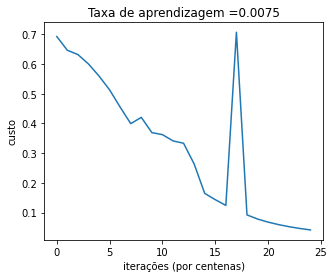

In [ ]:
## Treine a rede
parametros = L_layer_modelo(treino_x, treino_y, camadas_dims, num_iter = 2500, print_custo=True)

**Use os parâmetros treinados** para classificar as imagens de treinamento e teste e verificar a acurácia. 

In [ ]:
## Predição da rede
# dica : re-utilize e modifique a FUNCAO de predição do Lab1B
# GRADED FUNCTION: predição

def predicao(X, Y, parametros):
    '''
    Prediz se o rótulo é 0 ou 1 usando os parâmetros de aprendizagem (w,b) da regressão logística
    
    Entrada:
    X -- dados de treinamentos de tamanho (num_px * num_px * 3, número de exemplos)
    parametros -- dicionários de parâmetros da rede treinada
    Saída:
        Y_pred -- valores da pós-ativação da última camada em que (ativação_AL) > 0.5 é 1, e ativação_AL <=0.5 é 0)
    '''
    
    #ToDo : implemente a função
    AL, caches = L_modelo_forward(X, parametros)

    # Imprime o custo da execução:
    print("Custo da execução:{} %".format(custo(AL, Y,  m = Y.shape[1])))
     
    m = X.shape[1]       # número de exemplos. Dica: acesso o shape de X e veja qual valor adequado 
    
    # Converta as proobabilidades AL[0,i] para predição p[0,i]
    Y_pred = np.zeros((AL.shape))
    positive_pred_index = AL > 0.5
    Y_pred[positive_pred_index] =  1    
    ### Fim do código ###       
   
    assert(Y_pred.shape == (1, m))
    return Y_pred



Custo da execução:0.037764358556315575 %
Custo da execução:1.068635920880008 %
treino acurácia:100.0 %
teste acurácia: 72.0 %


<Figure size 288x144 with 0 Axes>

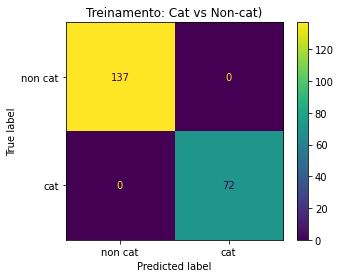

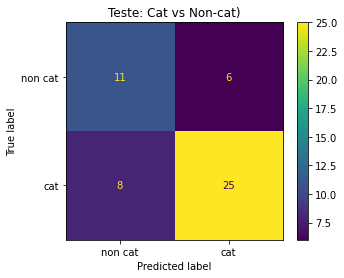

<Figure size 360x288 with 0 Axes>

In [ ]:
# (Daniela) Análise dos resultados do modelo:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predições do modelo:
Y_pred_treino = predicao(treino_x, treino_y, parametros)
Y_pred_teste = predicao(teste_x, teste_y, parametros)

# Imprime erros do treino/teste 
print("treino acurácia:{} %".format(100 - np.mean(np.abs(Y_pred_treino - treino_y)) * 100))
print("teste acurácia: {} %".format(100 - np.mean(np.abs(Y_pred_teste - teste_y)) * 100))

# Exibe matrizes de confusão para dados de treino e teste:
cm = confusion_matrix(treino_y[0][:], Y_pred_treino[0][:], labels=[0, 1])
disp_treino = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["non cat", "cat"])
 
cm = confusion_matrix(teste_y[0][:], Y_pred_teste[0][:], labels=[0, 1])
disp_teste = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["non cat", "cat"])

plt.figure(figsize=(4, 2)) 
disp_treino.plot()
plt.title("Treinamento: Cat vs Non-cat)")
disp_teste.plot()
plt.title("Teste: Cat vs Non-cat)")
plt.show()
plt.tight_layout()  

Resultado esperado:

Acurácia treino = 100%

Acurácia teste = 72%

Por que você obteve 100% no treino e apenas 72% no teste?

Resposta: houve um sobreajuste dos parâmetros da rede para o conjunto dos dados de treino. Nesse caso, o sobreajuste ocorreu uma vez que o conjunto de dados de treino é relativamente pequeno, e o modelo relativamente simples, assim o número de iterações de treinamento causou perfeito ajuste dos rótulos de treino às imagens de treino. Tudo permanecendo igual, se aumentarmos o conjunto de dados de treino podemos reduzir o overfiting.


### Testando com uma rede com 4 camadas

![Arq,widht=10](https://drive.google.com/uc?export=view&id=19h9LuWkWLVMYgAAoQKTfjJ-Er-tlw8En)
<caption><center> <u>Figura 8</u>: Rede neural com L camadas. <br> Resumo do modelo: ***ENTRADA -> LINEAR -> RELU -> LINEAR -> SIGMOID -> SAIDA***. </center></caption>

In [ ]:
### Executar uma rede de 4 camada ###
camadas_dims = [12288, 20, 7, 5, 1]


Custo depois da iteração 0: 0.693148
Custo depois da iteração 100: 0.678011
Custo depois da iteração 200: 0.667600
Custo depois da iteração 300: 0.660422
Custo depois da iteração 400: 0.655458
Custo depois da iteração 500: 0.652013
Custo depois da iteração 600: 0.649616
Custo depois da iteração 700: 0.647942
Custo depois da iteração 800: 0.646770
Custo depois da iteração 900: 0.645947
Custo depois da iteração 1000: 0.645368
Custo depois da iteração 1100: 0.644961
Custo depois da iteração 1200: 0.644673
Custo depois da iteração 1300: 0.644469
Custo depois da iteração 1400: 0.644325
Custo depois da iteração 1500: 0.644223
Custo depois da iteração 1600: 0.644151
Custo depois da iteração 1700: 0.644100
Custo depois da iteração 1800: 0.644063
Custo depois da iteração 1900: 0.644037
Custo depois da iteração 2000: 0.644019
Custo depois da iteração 2100: 0.644006
Custo depois da iteração 2200: 0.643997
Custo depois da iteração 2300: 0.643990
Custo depois da iteração 2400: 0.643985


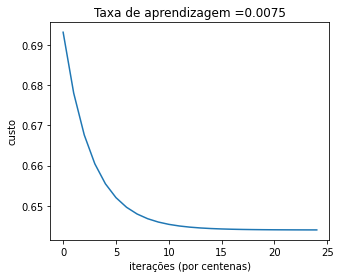

In [ ]:
## Treine a rede
parametros = L_layer_modelo(treino_x, treino_y, camadas_dims, num_iter = 2500, print_custo=True)

**Use os parâmetros treinados** para classificar as imagens de treinamento e teste e verificar a acurácia. 

Custo da execução:0.6439820182481262 %
Custo da execução:0.8442483661831203 %
treino acurácia:65.55023923444976 %
teste acurácia: 34.0 %


<Figure size 288x144 with 0 Axes>

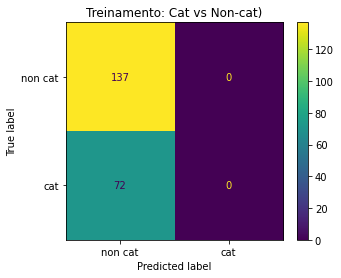

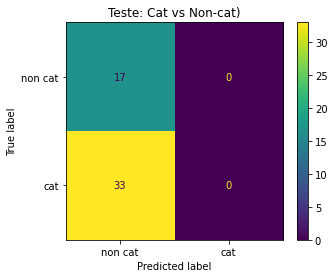

<Figure size 360x288 with 0 Axes>

In [ ]:
# dica : re-utilize e modifique a FUNCAO de predição do Lab1B
 
# Predições do modelo:
Y_pred_treino = predicao(treino_x, treino_y, parametros)
Y_pred_teste = predicao(teste_x, teste_y, parametros)

# Imprime erros do treino/teste 
print("treino acurácia:{} %".format(100 - np.mean(np.abs(Y_pred_treino - treino_y)) * 100))
print("teste acurácia: {} %".format(100 - np.mean(np.abs(Y_pred_teste - teste_y)) * 100))

# Exibe matrizes de confusão para dados de treino e teste:
cm = confusion_matrix(treino_y[0][:], Y_pred_treino[0][:], labels=[0, 1])
disp_treino = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["non cat", "cat"])
 
cm = confusion_matrix(teste_y[0][:], Y_pred_teste[0][:], labels=[0, 1])
disp_teste = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["non cat", "cat"])

plt.figure(figsize=(4, 2)) 
disp_treino.plot()
plt.title("Treinamento: Cat vs Non-cat)")
disp_teste.plot()
plt.title("Teste: Cat vs Non-cat)")
plt.show()
plt.tight_layout()  

# dica2: compute a matirz de confusão

Resultado esperado:

Acurácia no treino: 0.6555023923444976 

Acurácia no teste: 0.34

Este resultado foi melhor ou pior do que com duas camadas? Tente explicar os motivos.

Resposta: esse resultado foi pior, dessa vez ocorreu 'underfiting'. A curva e os custos exibidos demonstram que o modelo convergiu muito pouco em 2500 iterações. Para essa rede mais complexa, com mais parâmetros (pesos, bias, etc) são necessários mais dados (/mais iterações) para treinar o modelo. Além disso o modelo ficou propenso a classificar todo exemplar como um 'não gato' uma vez que os dados de treino estão desbalanceados para o número de classes(72 cat e 137 non-cat). 

# **Parte 2** - Classificação de múltiplas classes e uso de frameworks



No exemplo anterior, usamos uma arquitetura para classificação binária. Para classificaçõ de múltiplas classes, tem-se um neurônio de saída para cada classe (como ilustrado no exemplo da Figura 9) e deve-se usar a operação Softmax antes de se calcular o custo (entropia cruzada ou cross-entropy como no exemplo anterior). Consute o capítulo [3.6 do livro](http://d2l.ai/chapter_linear-networks/softmax-regression-scratch.html) para entender melhor.  No caso de se usar softmax, deve-se usar a função *one_hot* para transformar a saída em logits. Veja a função *one_hot* fornecida. Ela transforma um escalar em um *hot encoder*, de acordo com o número de classes.

![Arq,widht=10](https://drive.google.com/uc?export=view&id=1WV_4AT49bYcqsp6PB0FoO4p-gASo0bjL)<caption><center> <u>Figura 9</u>: Rede neural dois neurônios de saída. <br> </center></caption>




In [ ]:
# nclasses : numero de classes do prolema, y : um escalar ou vetor de escalares
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

In [ ]:
# ToDo : execute o exemplo e veja o resultado para 4 escalares no vetor de variáveis dependentes
one_hot(n_classes=10, y=[0, 4, 9, 1])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Função softmax 

A função softmax transforma a saĩda em uma distribuição de probabilidades. Assim, a soma de todas as saídas dos neurônio da última camada sempre vai ser igual a 1:

$$
softmax(\mathbf{x}) = \frac{1}{\sum_{i=1}^{n}{e^{x_i}}}
\cdot
\begin{bmatrix}
  e^{x_1}\\\\
  e^{x_2}\\\\
  \vdots\\\\
  e^{x_n}
\end{bmatrix}
$$

o gradiente para o custo usando-se a função softmax é trivial de se calcular:

$$dw = softmax(\mathbf{y_{pred}}) - y$$

In [ ]:
def softmax(X):
    exp = np.exp(X)
    return exp / np.sum(exp, axis=-1, keepdims=True)

In [ ]:
# ToDo : teste sua função softmax com a instância do exemplo abaixo 
print(softmax([10, 2, -3]))

# As saídas individuais devem ser entre 0 e 1 de forma que a soma seja 1. lembre-se, com softmax, temos probabilidades.
print(np.sum(softmax([10, 2, -3])))

[9.99662391e-01 3.35349373e-04 2.25956630e-06]
1.0


Perceba que nosso código também funciona se você passar um lote (batch) de amostras

In [ ]:
# Veja a saída abaixo
X = np.array([[10, 2, -3],
              [-1, 5, -20]])
print(softmax(X), np.sum(softmax(X)), np.sum(softmax(X[0])), np.sum(softmax(X[1])))

[[9.99662391e-01 3.35349373e-04 2.25956630e-06]
 [2.47262316e-03 9.97527377e-01 1.38536042e-11]] 2.0 1.0 1.0


Em seguida, deve-se computar o erro entre um vetor predito Y_pred e o vetor de rótulos Y_true. para tal, deve-se usar cross entropy loss, ou verossimilhança negativa (negative log likelihood). A função cross_entrppy() implementa a verossimilhança negativa.

In [ ]:
def cross_entropy(Y_true, Y_pred):
    EPSILON = 1e-8
  

    Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred)
    loglikelihoods = np.sum(np.log(EPSILON + Y_pred) * Y_true, axis=1)
    
    return -np.mean(loglikelihoods)

verifique o erro de uma predição bem ruim

In [ ]:
print(cross_entropy([1, 0, 0], softmax([0.12, 10, 1])))

9.879979210592268


verifique o erro de uma boa predição

In [ ]:
print(cross_entropy([1, 0, 0], [0.98, 0.01, .01]))

0.020202697113437834


A função cross_entropy() também deve funcionar para um lote de dados

In [ ]:
# Verifique a cross-entropy das três amostas seguintes:

Y_true = np.array([[0, 1, 0],
                   [1, 0, 0],
                   [0, 0, 1]])

Y_pred = np.array([[0,   1,    0],
                   [.99, 0.01, 0],
                   [0,   0,    1]])

# repare que as amostras são praticamente predições perfeitas
print(cross_entropy(Y_true, Y_pred))

0.0033501019174971905


## Pré-processamento dos dados

Vamos usar a biblioteca scikit learn para nos auxiliar na execução da prática. 
Veja a documentação em https://scikit-learn.org/stable/index.html

Considere a base de dados abaixo. Ela é referente a um atividade em um site de vendas qualquer. O objetivo com esta base é tentar predizer quais clientes futuros terão probabildiade de comprar algum produto, com base em algumas características, como cidade em que mora, idade e salário.

*Carregando os dados*

In [ ]:
# Importe as bibliotecas NumPy, Pandas e Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# carregue os dados do arquivo e armazenar em um Dataframe
dataset = pd.read_csv('/content/drive/MyDrive/disciplinasDoutorado/PCC177-2022-1(Redes)/lab3/Data.csv')

# imprima a estrutura dataset
print(dataset)

       Cidade  Idade  Salario Comprou
0  Ouro Preto   44.0  72000.0     Nao
1     Mariana   27.0  48000.0     Sim
2   Itabirito   30.0  54000.0     Nao
3     Mariana   38.0  61000.0     Nao
4   Itabirito   40.0      NaN     Sim
5  Ouro Preto   35.0  58000.0     Sim
6     Mariana    NaN  52000.0     Nao
7  Ouro Preto   48.0  79000.0     Sim
8   Itabirito   50.0  83000.0     Nao
9  Ouro Preto   37.0  67000.0     Sim


Crie dois objetos, uma chamado X, para receber as caracteísticas das instâncias e um chamado y para receber as classes. Observe que as instâncias devem ser organizadas em linha Assm, as características da linha 0 de X devem corresponder a classe da linha 0 de y Podemos chamar as variáveis de X (ou características -usadas para fazer a predição) de variáveis independentes e a variável de y (classe a ser predita) de variável dependente.

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

# imprima X e y
print(X)
print(y)

# imprima e analise o formato dos objetos
print(X.shape)
print(y.shape)

[['Ouro Preto' 44.0 72000.0]
 ['Mariana' 27.0 48000.0]
 ['Itabirito' 30.0 54000.0]
 ['Mariana' 38.0 61000.0]
 ['Itabirito' 40.0 nan]
 ['Ouro Preto' 35.0 58000.0]
 ['Mariana' nan 52000.0]
 ['Ouro Preto' 48.0 79000.0]
 ['Itabirito' 50.0 83000.0]
 ['Ouro Preto' 37.0 67000.0]]
['Nao' 'Sim' 'Nao' 'Nao' 'Sim' 'Sim' 'Nao' 'Sim' 'Nao' 'Sim']
(10, 3)
(10,)


In [ ]:
from sklearn.impute import SimpleImputer
#imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
# imprima a nova matriz X
print(X)

[['Ouro Preto' 44.0 72000.0]
 ['Mariana' 27.0 48000.0]
 ['Itabirito' 30.0 54000.0]
 ['Mariana' 38.0 61000.0]
 ['Itabirito' 40.0 63777.77777777778]
 ['Ouro Preto' 35.0 58000.0]
 ['Mariana' 38.77777777777778 52000.0]
 ['Ouro Preto' 48.0 79000.0]
 ['Itabirito' 50.0 83000.0]
 ['Ouro Preto' 37.0 67000.0]]


# Parte 3 - Construção MLP no TensorFlow

**Continuação proposta (Eduardo):**











## 1-  Definindo as Redes




In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

#função para definição das 3 redes
# Create a `Sequential` model and add a Dense layer as the first layer.
 
# Rede 1 (2 camadas (7,1)):
def net1(initializer, activation = "relu", alpha_LRelu = 0.3):
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.InputLayer(input_shape=(12288,)))
 
    if activation == "relu":
        model.add(tf.keras.layers.Dense(7, kernel_initializer = initializer))   
        model.add(tf.keras.layers.ReLU()) 
        #model.add(tf.keras.layers.Dense(7, activation= 'relu', kernel_initializer = initializer))
    elif activation == "leakrelu":
        model.add(tf.keras.layers.Dense(7, kernel_initializer = initializer))   
        model.add(tf.keras.layers.LeakyReLU(alpha=alpha_LRelu))
    else: 
       model.add(tf.keras.layers.Dense(7, activation=activation, kernel_initializer = initializer))   
        
    model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer = initializer))
    return model  

# Rede 2 (4 camadas (20,7,5,1)):
def net2(initializer, activation = "relu", alpha_LRelu = 0.3):
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.InputLayer(input_shape=(12288,)))
    if activation == "relu":
        model.add(tf.keras.layers.Dense(20, kernel_initializer = initializer))   
        model.add(tf.keras.layers.ReLU()) 
        model.add(tf.keras.layers.Dense(7, kernel_initializer = initializer))   
        model.add(tf.keras.layers.ReLU()) 
        model.add(tf.keras.layers.Dense(5, kernel_initializer = initializer))   
        model.add(tf.keras.layers.ReLU()) 
    elif activation == "leakrelu":
        model.add(tf.keras.layers.Dense(20, kernel_initializer = initializer))   
        model.add(tf.keras.layers.LeakyReLU(alpha=alpha_LRelu))
        model.add(tf.keras.layers.Dense(7, kernel_initializer = initializer))   
        model.add(tf.keras.layers.LeakyReLU(alpha=alpha_LRelu))
        model.add(tf.keras.layers.Dense(5, kernel_initializer = initializer))   
        model.add(tf.keras.layers.LeakyReLU(alpha=alpha_LRelu))
    else: 
       model.add(tf.keras.layers.Dense(20, activation=activation, kernel_initializer = initializer))   
       model.add(tf.keras.layers.Dense(7, activation=activation, kernel_initializer = initializer))   
       model.add(tf.keras.layers.Dense(5, activation=activation, kernel_initializer = initializer))   
      
    model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer = initializer))
    return model  

# Rede 3 (3 camadas (23,11,7,3,1)) com batch_size=None: 10
def net3(initializer, activation = "relu", alpha_LRelu = 0.3):
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.InputLayer(input_shape=(12288,)))
    if activation == "relu":
        model.add(tf.keras.layers.Dense(23, kernel_initializer = initializer))   
        model.add(tf.keras.layers.ReLU()) 
        model.add(tf.keras.layers.Dense(11, kernel_initializer = initializer))   
        model.add(tf.keras.layers.ReLU()) 
        model.add(tf.keras.layers.Dense(7, kernel_initializer = initializer))   
        model.add(tf.keras.layers.ReLU()) 
        model.add(tf.keras.layers.Dense(3, kernel_initializer = initializer))   
        model.add(tf.keras.layers.ReLU()) 
    elif activation == "leakrelu":
        model.add(tf.keras.layers.Dense(23, kernel_initializer = initializer))   
        model.add(tf.keras.layers.LeakyReLU(alpha=alpha_LRelu))
        model.add(tf.keras.layers.Dense(11, kernel_initializer = initializer))   
        model.add(tf.keras.layers.LeakyReLU(alpha=alpha_LRelu))
        model.add(tf.keras.layers.Dense(7, kernel_initializer = initializer))   
        model.add(tf.keras.layers.LeakyReLU(alpha=alpha_LRelu))
        model.add(tf.keras.layers.Dense(3, kernel_initializer = initializer))   
        model.add(tf.keras.layers.LeakyReLU(alpha=alpha_LRelu))
    else: 
       model.add(tf.keras.layers.Dense(23, activation=activation, kernel_initializer = initializer))   
       model.add(tf.keras.layers.Dense(11, activation=activation, kernel_initializer = initializer))   
       model.add(tf.keras.layers.Dense(7, activation=activation, kernel_initializer = initializer))   
       model.add(tf.keras.layers.Dense(3, activation=activation, kernel_initializer = initializer))   
    
    model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer = initializer))
    return model

# treina a rede
def train(net, loss, trainer, data_train, label_train, metrics, epochs=100):
    net.compile(optimizer=trainer, loss=loss, metrics=metrics) 

    # treinamento 
    hist = net.fit(data_train, label_train, epochs=epochs, verbose=0)

    # Curvas de aprendizagem:
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.plot(np.squeeze(hist.history['loss']))
    #ax1.ylabel('custo')
    #ax1.xlabel('iterações')
     
    ax2.plot(np.squeeze(hist.history['accuracy']))
    #ax2.ylabel('acuracia')
    #ax2.xlabel('iterações')
    f.suptitle('Training loss (left) and Accuracy (rigth)')
    plt.show()
    
def predict (net, data_test, label_test):
    return net.evaluate(data_test, label_test, verbose=1)

def run (net, data_test):
    return net(data_test)

def test_rede3(inicializador, trainer, alpha_LRelu = None, activation = "relu", descr="Rede 3(23,11,7,3,1), Relu, SGD, init Uniform ~ N(0,0.01)"):
    net = net3(inicializador, activation, alpha_LRelu)
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False) 
    train(net, loss, trainer, treino_x.T, treino_y.T, metrics=['accuracy'], epochs=2500)

    print(f'\n Validação - {descr}')
    pred = predict (net, teste_x.T, teste_y.T)
    return net


  
## 2- Repita o problema (classificação de gato/não-gato):

Primeiro usando Tensorflow/Keras (ou pytorch/mxnet). Use uma loss baseada em softmax e compare os resultados. Primeiro, implemente a rede de uma camada e depois, a de quatro camadas (mesma arquitetura da Parte-1). 

 Plote a curva de custo (epochs vs loss) para cada caso. O que você conclui? 








### Rede 1 (2 camadas (7,1)), Relu, SGD, inicializador Uniform 

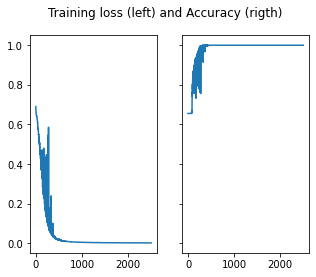


Resultado: validação da Rede 1: 2 camadas (7,1), ativação Relu, otimizador SGD, inicializador Uniform ~ N(0,0.01) :
2/2 [==============================] - 0s 7ms/step - loss: 1.9180 - accuracy: 0.7000


In [ ]:
# Usando dados treino_x_vet (209x 12288), teste_x_vet (209x 12288), teste_y.T(209 x 1), teste_y.T(50 x 1)
# Rede 1 (2 camadas (7,1)), ativação Relu, otimizador SGD, inicializador Uniform :
ativacao = 'relu'
alpha_relu = 0.0
inicializador = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
trainer = tf.keras.optimizers.SGD(learning_rate=0.0075) 

net = net1(inicializador, activation = "relu")

train(net, loss, trainer, treino_x.T, treino_y.T, metrics=['accuracy'], epochs=2500)

print("\nResultado: validação da Rede 1: 2 camadas (7,1), ativação Relu, otimizador SGD, inicializador Uniform ~ N(0,0.01) :")
pred = predict (net, teste_x.T, teste_y.T)

### Rede 2 (4 camadas (10,7,5,1)), Relu, SGD, inicializador Uniform 

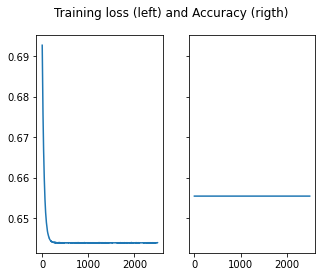


Resultado: validação da Rede 1: 2 camadas (7,1), ativação Relu, otimizador SGD, inicializador Uniform ~ N(0,0.01) :
2/2 [==============================] - 0s 8ms/step - loss: 0.8452 - accuracy: 0.3400


In [ ]:
# Usando dados treino_x_vet (209x 12288), teste_x_vet (209x 12288), teste_y.T(209 x 1), teste_y.T(50 x 1)
# Rede 2 (4 camadas (20,7,5,1)), ativação Relu, otimizador SGD, inicializador Uniform :
ativacao = 'relu'
alpha_relu = 0.0
inicializador = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
trainer = tf.keras.optimizers.SGD(learning_rate=0.0075) 

net = net2(inicializador, activation = "relu")

train(net, loss, trainer, treino_x.T, treino_y.T, metrics=['accuracy'], epochs=2500)

print("\nResultado: validação da Rede 2: 4 camadas (20,7,5,1), ativação Relu, otimizador SGD, inicializador Uniform ~ N(0,0.01) :")
pred = predict (net, teste_x.T, teste_y.T)
 

** Duvida: não entendi porque a perda do teste acima está baixa, pela acurácia menor ainda!  A rede 3 apresentou acurácia maior e perda maior! 

### Rede 3 (5 camadas (23,11,7,3,1)), Relu, SGD, inicializador RandomNormal

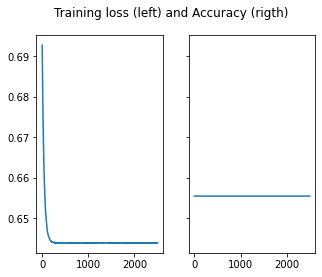


 Validação - Rede 3(23,11,7,3,1), Relu, SGD, init Uniform ~ N(0,0.01)
2/2 [==============================] - 0s 6ms/step - loss: 0.8471 - accuracy: 0.3400


In [ ]:
# Usando dados treino_x_vet (209x 12288), teste_x_vet (209x 12288), teste_y.T(209 x 1), teste_y.T(50 x 1)
# Rede 3 (5 camadas (23,11,7,3,1)), ativação Relu, otimizador SGD, inicializador RandomNormal, LR=0.0075:




inicializador = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
trainer = tf.keras.optimizers.SGD(learning_rate=0.0075) 
net = test_rede3(inicializador, trainer, activation = "relu")
#y_pred = run(net, teste_x.T)
#print(y_pred)
 

  
## 3-  Alterando os hiperparâmetros (para rede 3):
     
    
 








    *  Algoritmo de otimização (SGD com momento, ADAM, ADADELTA, RMSPROP)
    *  Inicialização dos pesos: inicialização aleatória vs uniforme
    *  Funções de ativação : troque a sigmoid por (ReLU, GELU, Leaky RELU)
 
 Qual combinação rendeu o melhor resultado? Tente explicar o por que.

## 3.1 - Alterando inicializadores

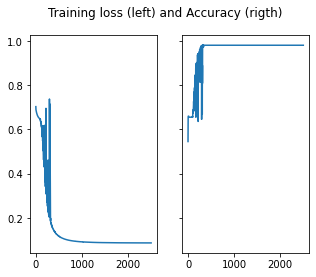


 Validação - (5 camadas (23,11,7,3,1)), Relu, SGD, init GlorotNormal
2/2 [==============================] - 0s 6ms/step - loss: 1.2896 - accuracy: 0.7600


In [ ]:
# Rede 3 (5 camadas (23,11,7,3,1)), ativação Relu, otimizador SGD, inicializador GlorotNormal :
 
inicializador = tf.keras.initializers.GlorotNormal() 
trainer = tf.keras.optimizers.SGD(learning_rate=0.0075) 
net = net = test_rede3(inicializador, trainer, activation = "relu", descr="(5 camadas (23,11,7,3,1)), Relu, SGD, init GlorotNormal") 
 

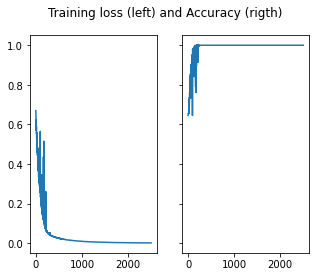


 Validação - (5 camadas (23,11,7,3,1)), Relu, SGD, init GlorotUniform
2/2 [==============================] - 0s 8ms/step - loss: 2.1483 - accuracy: 0.6800


In [ ]:
# Rede 3 (5 camadas (23,11,7,3,1)), ativação Relu, otimizador SGD, inicializador GlorotUniform :
 
inicializador = tf.keras.initializers.GlorotUniform() 
trainer = tf.keras.optimizers.SGD(learning_rate=0.0075) 
net = net = test_rede3(inicializador, trainer, activation = "relu", descr="(5 camadas (23,11,7,3,1)), Relu, SGD, init GlorotUniform") 

## 3.2 - Alterando Funções de ativação (GELU e Leaky RELU)

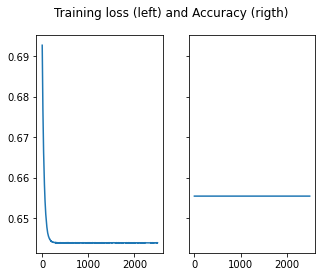


 Validação - Rede 3(23,11,7,3,1), GELU, SGD, init Uniform ~ N(0,0.01)
2/2 [==============================] - 0s 6ms/step - loss: 0.8480 - accuracy: 0.3400


In [ ]:
# Rede 3 (5 camadas (23,11,7,3,1)), ativação GELU, otimizador SGD, inicializador Uniform ~ N(0,0.01) :
 
inicializador = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
trainer = tf.keras.optimizers.SGD(learning_rate=0.0075) 
net = test_rede3(inicializador, trainer, activation = "gelu", descr="Rede 3(23,11,7,3,1), GELU, SGD, init Uniform ~ N(0,0.01)")

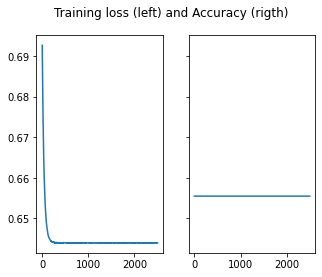


 Validação - Rede 3(23,11,7,3,1), LeakyRELU, SGD, init Uniform ~ N(0,0.01)
2/2 [==============================] - 0s 6ms/step - loss: 0.8469 - accuracy: 0.3400


In [ ]:
# Rede 3 (5 camadas (23,11,7,3,1)), ativação  LeakyRELU, otimizador SGD, inicializador Uniform ~ N(0,0.01) :
 
inicializador = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
trainer = tf.keras.optimizers.SGD(learning_rate=0.0075) 
net = test_rede3(inicializador, trainer, alpha_LRelu = 0.3, activation = "leakrelu", descr="Rede 3(23,11,7,3,1), LeakyRELU, SGD, init Uniform ~ N(0,0.01)")

## 3.3 - Alterando o algoritmo de otimização (SGD com momento, ADAM, ADADELTA, RMSPROP)

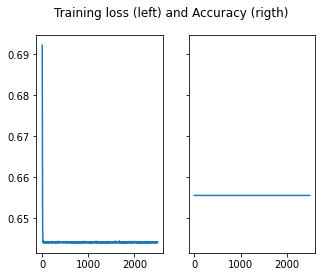


 Validação - Rede 3(23,11,7,3,1), Relu, SGD com momentum=0.9, init Uniform ~ N(0,0.01)
2/2 [==============================] - 0s 6ms/step - loss: 0.8465 - accuracy: 0.3400


In [ ]:
# Rede 3 (5 camadas (23,11,7,3,1)), ativação  RELU, otimizador SGD com momento = 0.9, inicializador Uniform ~ N(0,0.01) :
 
inicializador = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
trainer = tf.keras.optimizers.SGD(learning_rate=0.0075, momentum=0.9) 
net = test_rede3(inicializador, trainer, activation = "relu", descr="Rede 3(23,11,7,3,1), Relu, SGD com momentum=0.9, init Uniform ~ N(0,0.01)")

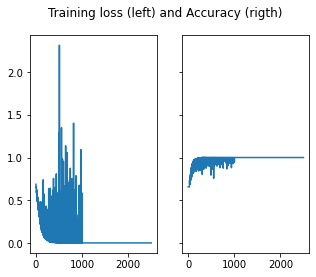


 Validação - Rede 3(23,11,7,3,1), Relu, RMSProp com rho=0.9, init Uniform ~ N(0,0.01)
2/2 [==============================] - 0s 8ms/step - loss: 13.7201 - accuracy: 0.6200


In [ ]:
# Rede 3 (5 camadas (23,11,7,3,1)), ativação  RELU, otimizador RMSProp com rho = 0.9, inicializador Uniform ~ N(0,0.01) :
 
inicializador = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
trainer = tf.keras.optimizers.RMSprop(learning_rate=0.0075,  rho=0.9) 
net = test_rede3(inicializador, trainer, activation = "relu", descr="Rede 3(23,11,7,3,1), Relu, RMSProp com rho=0.9, init Uniform ~ N(0,0.01)")

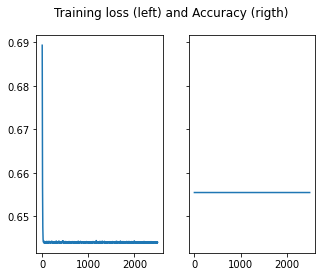


 Validação - Rede 3(23,11,7,3,1), Relu, ADAM, init Uniform ~ N(0,0.01)
2/2 [==============================] - 0s 6ms/step - loss: 0.8451 - accuracy: 0.3400


In [ ]:
# Rede 3 (5 camadas (23,11,7,3,1)), ativação  RELU, otimizador ADAM, inicializador Uniform ~ N(0,0.01) :
 
inicializador = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
trainer = tf.keras.optimizers.Adam(learning_rate=0.0075, beta_1=0.9, beta_2=0.999)
net = test_rede3(inicializador, trainer, activation = "relu", descr="Rede 3(23,11,7,3,1), Relu, ADAM, init Uniform ~ N(0,0.01)")

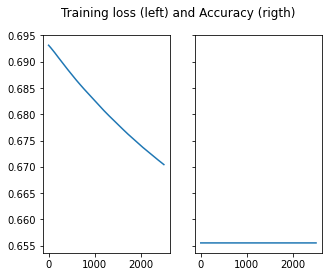


 Validação - Rede 3(23,11,7,3,1), Relu, ADADELTA, init Uniform ~ N(0,0.01)
2/2 [==============================] - 0s 13ms/step - loss: 0.7238 - accuracy: 0.3400


In [ ]:
# Rede 3 (5 camadas (23,11,7,3,1)), ativação  RELU, otimizador ADADELTA, inicializador Uniform ~ N(0,0.01) :
 
inicializador = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
trainer = tf.keras.optimizers.Adadelta(learning_rate=0.0075, rho=0.95)
net = test_rede3(inicializador, trainer, activation = "relu", descr="Rede 3(23,11,7,3,1), Relu, ADADELTA, init Uniform ~ N(0,0.01)")

##3.4 - Alterando learning rate

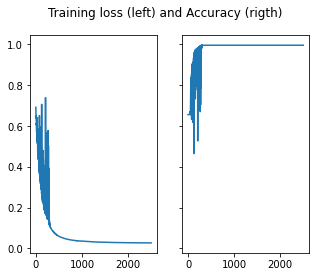


 Validação - (5 camadas (23,11,7,3,1)), Relu, SGD, init GlorotNormal, LR=0.01
2/2 [==============================] - 0s 6ms/step - loss: 2.4138 - accuracy: 0.6200


In [23]:
 # Rede 3 (5 camadas (23,11,7,3,1)), ativação Relu, otimizador SGD, inicializador GlorotNormal, LR=0.01:
 
inicializador = tf.keras.initializers.GlorotNormal(seed = 42)
trainer = tf.keras.optimizers.SGD(learning_rate=0.01) 
net = net = test_rede3(inicializador, trainer, activation = "relu", descr="(5 camadas (23,11,7,3,1)), Relu, SGD, init GlorotNormal, LR=0.01") 
 

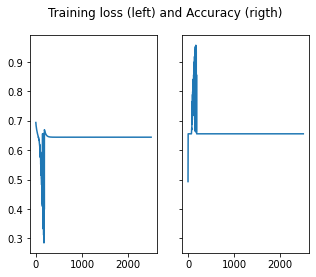


 Validação - (5 camadas (23,11,7,3,1)), Relu, SGD, init GlorotUniform, , LR=0.01
2/2 [==============================] - 0s 7ms/step - loss: 0.8474 - accuracy: 0.3400


In [ ]:
# Rede 3 (5 camadas (23,11,7,3,1)), ativação Relu, otimizador SGD, inicializador GlorotUniform, LR=0.01:
 
inicializador = tf.keras.initializers.GlorotUniform() 
trainer = tf.keras.optimizers.SGD(learning_rate=0.01) 
net = net = test_rede3(inicializador, trainer, activation = "relu", descr="(5 camadas (23,11,7,3,1)), Relu, SGD, init GlorotUniform, , LR=0.01") 

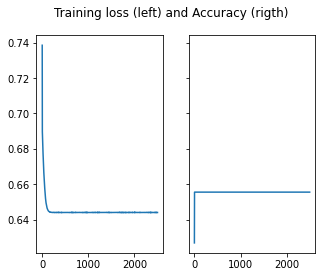


 Validação - Rede 3(23,11,7,3,1), Relu, RMSProp com rho=0.9, init GlorotNormal, LR=0.001
2/2 [==============================] - 0s 8ms/step - loss: 0.8485 - accuracy: 0.3400


In [24]:
# Rede 3 (5 camadas (23,11,7,3,1)), ativação  RELU, otimizador RMSProp com rho = 0.9, inicializador GlorotNormal, LR=0.001 :
 
inicializador = tf.keras.initializers.GlorotNormal(seed = 42)
trainer = tf.keras.optimizers.RMSprop(learning_rate=0.001,  rho=0.9) 
net = test_rede3(inicializador, trainer, activation = "relu", descr="Rede 3(23,11,7,3,1), Relu, RMSProp com rho=0.9, init GlorotNormal, LR=0.001")

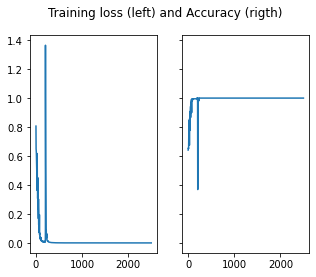


 Validação - Rede 3(23,11,7,3,1), Relu, ADAM, init GlorotNormal, LR=0.001 
2/2 [==============================] - 0s 8ms/step - loss: 5.8008 - accuracy: 0.7000


In [25]:
# Rede 3 (5 camadas (23,11,7,3,1)), ativação  RELU, otimizador ADAM, inicializador GlorotNormal, LR=0.001 :

inicializador = tf.keras.initializers.GlorotNormal(seed = 42)
trainer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
net = test_rede3(inicializador, trainer, activation = "relu", descr="Rede 3(23,11,7,3,1), Relu, ADAM, init GlorotNormal, LR=0.001 ")

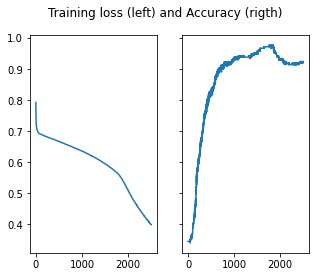


 Validação - Rede 3(23,11,7,3,1), Relu, ADADELTA, init GlorotNormal, LR=0.0015
2/2 [==============================] - 0s 7ms/step - loss: 0.6817 - accuracy: 0.6200


In [26]:
# Rede 3 (5 camadas (23,11,7,3,1)), ativação  RELU, otimizador ADADELTA, inicializador GlorotNormal, LR=0.001:
 
inicializador = tf.keras.initializers.GlorotNormal(seed = 42)  
trainer = tf.keras.optimizers.Adadelta(learning_rate=0.0015, rho=0.95)
net = test_rede3(inicializador, trainer, activation = "relu", descr="Rede 3(23,11,7,3,1), Relu, ADADELTA, init GlorotNormal, LR=0.0015")

## 3.5 - Conclusões

* Um resumo dos experimentos para a Rede proposta de 5 camadas, treinada por 2500 épocas, é exibido abaixo:

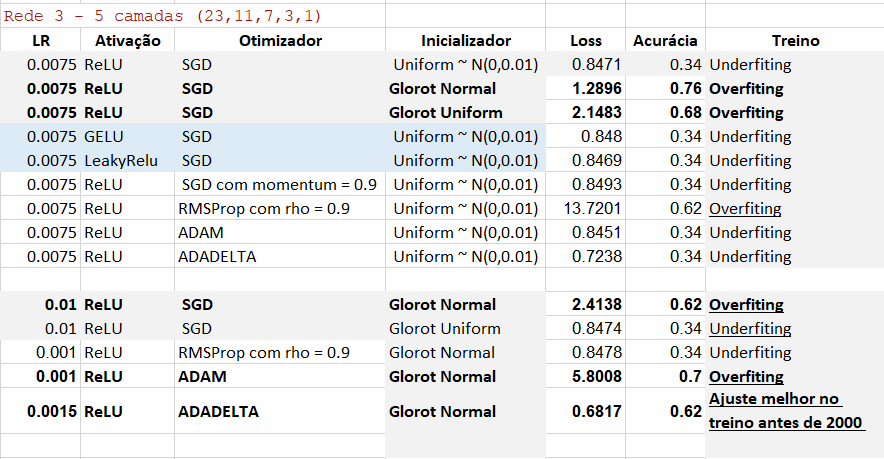

A rede proposta usando função de ativação Relu, otimizador SGD, inicializador GlorotNormal, embora causou overfiting no treino, rendeu o melhor resultado.
O uso de todos os demais otimizadores (SGD com momentum, RMSProp, ADAM e ADADELTA), a maioria  auto-adaptados para cada parâmetro, não resultaram em melhorias significativas no modelo. 
A única configuração que não gerou nem overfiting nem underfíting foi usando otimizador ADADelta, porém ainda com uma acúrácia baixa para os dados de teste.

As hipóteses abaixo podem explicar os resultados ruins:
  - Poucos dados, desbalanceados são usados para treino (e teste)
  - A arquitetura MLP não é a melhor solução para o problema.
